In [ ]:
!pip install -q transformers  # (20 sec)
!pip install wordninja

     |████████████████████████████████| 5.8 MB 5.3 MB/s 
     |████████████████████████████████| 182 kB 37.7 MB/s 
     |████████████████████████████████| 7.6 MB 45.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 541 kB 5.4 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541552 sha256=ad46a598cf6f55301893b1a72235b2681a392a3e5adad117448d027987104b52
  Stored in directory: /root/.cache/pip/wheels/a6/08/fb/98831d1c2702c8352a339f91104515eab5d7906d4118eeeaed
Successfully built wordninja


In [ ]:
import pandas as pd  # (13 sec)
import wordninja

import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

import nltk.corpus
from nltk.book import *
from nltk.corpus import brown

english_vocab = set(w.lower() for w in nltk.corpus.words.words())

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzi

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Data/Cleaned Data/Copy of DomainMergedFile.csv')  # (10 sec)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,Domain,category
0,andyburd.com,10
1,musicals.com,10
2,cultura.com,10
3,ifly.com,10
4,mirror.com,10


In [ ]:
len(df)

8708039

In [ ]:
import re                   # (15 sec)
import numpy as np

df['host'] = df['Domain'].apply(lambda d: re.sub('\.com$', '', d))

# may be empty host - check
df['host'].replace('', np.nan, inplace=True)
df.dropna(subset=['host'], inplace=True)

In [ ]:
df['length'] = df['host'].apply(lambda h: len(h))          # ............ (16 mins)
df['StartWithNumber'] = df['host'].apply(lambda h: h[0].isdigit())
df['EndswithNumber'] = df['host'].apply(lambda h: h[-1].isdigit())
df['words'] = df['host'].apply(wordninja.split)

In [ ]:
# ........... (15 sec)
def calculate_words_len(val):
  if val:
    return [len(word) for word in val]
  return []

df['words_len'] = df['words'].apply(calculate_words_len)

In [ ]:
# .......... (10 sec)
def check_type(val: str):
  if val.isdigit():
    return 1
  if val.isalpha():
    return 2
  return 3

df['character_type'] = df['host'].apply(check_type)

In [ ]:
# get the list of words that exists in dictionary........... (7.5 mins)
from nltk.corpus import wordnet as wn

def get_dict_words(val):
  new_list = []
  for word in val:
    if word and not word.strip(word[0]):
      continue

    temp_l = wn.synsets(word)
    if temp_l and (word in english_vocab or temp_l[0].pos()) and not word.isdigit():
      new_list.append(word)
  return new_list

df['dict_words'] = df['words'].apply(get_dict_words)

In [ ]:
df['dictionary_words_count'] = df['dict_words'].apply(lambda l: len(l))  # (3 sec)

In [ ]:
# check lexical_diversity    # ........... (10 sec)
def lexical_diversity(text):
    return len(text) / len(set(text))

def percentage(count, total):
    return 100 * count / total

df['lexical_diversity'] = df['host'].apply(lexical_diversity)

In [ ]:
# POS tagging and grammer syntactics based of that        # ( 12 mins and 11sec for full dataset in column wise )
from nltk import pos_tag                                 
def add_pos_tag(h):
    tag_token = pos_tag(h)
    return tag_token

df['pos_tag'] = add_pos_tag(df['host'])

df['is_adjective'] = df['pos_tag'].apply(lambda x: x[1] == 'JJ')
df['is_coordinating_conjunction'] = df['pos_tag'].apply(lambda x: x[1] == 'CC')
df['is_cardinal_digit'] = df['pos_tag'].apply(lambda x: x[1] == 'CD')
df['is_determiner'] = df['pos_tag'].apply(lambda x: x[1] == 'DT')
df['is_existential_there'] = df['pos_tag'].apply(lambda x: x[1] == 'EX')
df['is_foreign_word'] = df['pos_tag'].apply(lambda x: x[1] == 'FW')
df['is_preposition_conjunction'] = df['pos_tag'].apply(lambda x: x[1] == 'IN')
df['is_adjective_comparative'] = df['pos_tag'].apply(lambda x: x[1] == 'JJR')
df['is_adjective_superlative'] = df['pos_tag'].apply(lambda x: x[1] == 'JJS')
df['is_list_market'] = df['pos_tag'].apply(lambda x: x[1] == 'LS')
df['is_modal'] = df['pos_tag'].apply(lambda x: x[1] == 'MD')
df['is_noun_singular'] = df['pos_tag'].apply(lambda x: x[1] == 'NN')
df['is_noun_plural'] = df['pos_tag'].apply(lambda x: x[1] == 'NNS')
df['is_proper_noun_singular'] = df['pos_tag'].apply(lambda x: x[1] == 'NNP')
df['is_proper_noun_plural'] = df['pos_tag'].apply(lambda x: x[1] == 'NNPS')
df['is_predeterminer'] = df['pos_tag'].apply(lambda x: x[1] == 'PDT')
df['is_possessive_ending'] = df['pos_tag'].apply(lambda x: x[1] == 'POS')
df['is_personal_pronoun'] = df['pos_tag'].apply(lambda x: x[1] == 'PRP')
df['is_possessive_pronoun'] = df['pos_tag'].apply(lambda x: x[1] == 'PRP$')
df['is_adverb'] = df['pos_tag'].apply(lambda x: x[1] == 'RB')
df['is_adverb_comparative'] = df['pos_tag'].apply(lambda x: x[1] == 'RBR')
df['is_adverb_superlative'] = df['pos_tag'].apply(lambda x: x[1] == 'RBS')
df['is_particle'] = df['pos_tag'].apply(lambda x: x[1] == 'RP')
df['is_infinite_marker'] = df['pos_tag'].apply(lambda x: x[1] == 'TO')
df['is_interjection'] = df['pos_tag'].apply(lambda x: x[1] == 'UH')
df['is_verb'] = df['pos_tag'].apply(lambda x: x[1] == 'VB')
df['is_verb_gerund'] = df['pos_tag'].apply(lambda x: x[1] == 'VBG')
df['is_verb_past_tense'] = df['pos_tag'].apply(lambda x: x[1] == 'VBD')
df['is_verb_past_participle'] = df['pos_tag'].apply(lambda x: x[1] == 'VBN')
df['is_verb_present'] = df['pos_tag'].apply(lambda x: x[1] == 'VBP')
df['is_verb_present_3rd_person_singular'] = df['pos_tag'].apply(lambda x: x[1] == 'VBZ')
df['is_wh_determiner'] = df['pos_tag'].apply(lambda x: x[1] == 'WDT')
df['is_wh_pronoun'] = df['pos_tag'].apply(lambda x: x[1] == 'WP')
df['is_wh_adverb'] = df['pos_tag'].apply(lambda x: x[1] == 'WRB')

In [ ]:
df.head()

,Domain,category,host,length,StartWithNumber,EndswithNumber,words,words_len,character_type,dict_words,...,is_interjection,is_verb,is_verb_gerund,is_verb_past_tense,is_verb_past_participle,is_verb_present,is_verb_present_3rd_person_singular,is_wh_determiner,is_wh_pronoun,is_wh_adverb
0,andyburd.com,10,andyburd,8,False,False,"[and, yb, urd]","[3, 2, 3]",2,"[yb, urd]",...,False,False,False,False,False,False,False,False,False,False
1,musicals.com,10,musicals,8,False,False,[musicals],[8],2,[musicals],...,False,False,False,False,False,False,False,False,False,False
2,cultura.com,10,cultura,7,False,False,[cultura],[7],2,[],...,False,False,False,False,False,True,False,False,False,False
3,ifly.com,10,ifly,4,False,False,"[i, fly]","[1, 3]",2,[fly],...,False,False,False,False,False,False,False,False,False,False
4,mirror.com,10,mirror,6,False,False,[mirror],[6],2,[mirror],...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# sentiment check using huggingface (this cell runs approx 9hr:33min) (GPU RAM = 12hr:28mins)and throws error
from transformers import pipeline
sentiment_number = {
    'POSITIVE': 1,
    'NEUTRAL': 0,
    'NEGATIVE': -1,
}

sentiment_pipeline = pipeline("sentiment-analysis")
domain_input_data = df['host'].tolist()
#sentiment_results = sentiment_pipeline(domain_input_data)
#df['Sentiment'] = df.apply(lambda row: sentiment_number[sentiment_results[row.name]['label']], axis=1)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df.head()

,Domain,category,host,length,StartWithNumber,EndswithNumber,words,words_len,character_type,dict_words,...,is_interjection,is_verb,is_verb_gerund,is_verb_past_tense,is_verb_past_participle,is_verb_present,is_verb_present_3rd_person_singular,is_wh_determiner,is_wh_pronoun,is_wh_adverb
0,andyburd.com,10,andyburd,8,False,False,"[and, yb, urd]","[3, 2, 3]",2,"[yb, urd]",...,False,False,False,False,False,False,False,False,False,False
1,musicals.com,10,musicals,8,False,False,[musicals],[8],2,[musicals],...,False,False,False,False,False,False,False,False,False,False
2,cultura.com,10,cultura,7,False,False,[cultura],[7],2,[],...,False,False,False,False,False,True,False,False,False,False
3,ifly.com,10,ifly,4,False,False,"[i, fly]","[1, 3]",2,[fly],...,False,False,False,False,False,False,False,False,False,False
4,mirror.com,10,mirror,6,False,False,[mirror],[6],2,[mirror],...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# df.to_csv('/content/drive/MyDrive/ML/output_more_data.xlsx')

#Temporary Test by decreasing number of classes

In [ ]:
import pandas as pd     # ( 1 min )
df = pd.read_csv('/content/drive/MyDrive/ML/output_more_data.xlsx') # , nrows=100
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
# Making and Confirming : Logic

import math
for x in range(1, 11):
  print(x, math.floor((x-1) / 2) + 1)

1 1
2 1
3 2
4 2
5 3
6 3
7 4
8 4
9 5
10 5


In [ ]:
# reduce categories
import math
import numpy as np

df['category'] = np.int16((df.category - 1) / 2) + 1

In [ ]:
df.groupby('category').size()

category
1    8324707
2     229567
3     107932
4      35454
5      10379
dtype: int64

In [ ]:
df.to_hdf('/content/drive/MyDrive/ML/less_cat_output_more_data.h5', 'less_cat_output_more_data') # ( 1 min )

#Neural Network

In [ ]:
# Now the dataset is ready and pass that to the neural network

In [ ]:
import pandas as pd           # ( 1 min )
df = pd.read_hdf('/content/drive/MyDrive/ML/less_cat_output_more_data.h5', 'less_cat_output_more_data') # , nrows=100
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
# df = df.head(100)
df.head() 

,Domain,category,host,length,StartWithNumber,EndswithNumber,words,words_len,character_type,dict_words,...,is_interjection,is_verb,is_verb_gerund,is_verb_past_tense,is_verb_past_participle,is_verb_present,is_verb_present_3rd_person_singular,is_wh_determiner,is_wh_pronoun,is_wh_adverb
0,andyburd.com,5,andyburd,8,False,False,"['and', 'yb', 'urd']","[3, 2, 3]",2,"['yb', 'urd']",...,False,False,False,False,False,False,False,False,False,False
1,musicals.com,5,musicals,8,False,False,['musicals'],[8],2,['musicals'],...,False,False,False,False,False,False,False,False,False,False
2,cultura.com,5,cultura,7,False,False,['cultura'],[7],2,[],...,False,False,False,False,False,True,False,False,False,False
3,ifly.com,5,ifly,4,False,False,"['i', 'fly']","[1, 3]",2,['fly'],...,False,False,False,False,False,False,False,False,False,False
4,mirror.com,5,mirror,6,False,False,['mirror'],[6],2,['mirror'],...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import tensorflow as tf
import numpy as np

ml_df = df.drop(['pos_tag', 'words', 'words_len', 'dict_words'], axis=1)
# X = df.drop(['pos_tag', 'words', 'words_len', 'dict_words'], axis=1).iloc[:, 2:].values
# Y = df['category'].values

In [ ]:
min_category = ml_df['category'].min()   # (22 sec)
ml_df['category'] = ml_df['category'].apply(lambda cat: cat - min_category)
ml_df.head()

,Domain,category,host,length,StartWithNumber,EndswithNumber,character_type,dictionary_words_count,lexical_diversity,is_adjective,...,is_interjection,is_verb,is_verb_gerund,is_verb_past_tense,is_verb_past_participle,is_verb_present,is_verb_present_3rd_person_singular,is_wh_determiner,is_wh_pronoun,is_wh_adverb
0,andyburd.com,4,andyburd,8,False,False,2,2,1.142857,True,...,False,False,False,False,False,False,False,False,False,False
1,musicals.com,4,musicals,8,False,False,2,1,1.142857,False,...,False,False,False,False,False,False,False,False,False,False
2,cultura.com,4,cultura,7,False,False,2,0,1.166667,False,...,False,False,False,False,False,True,False,False,False,False
3,ifly.com,4,ifly,4,False,False,2,1,1.000000,True,...,False,False,False,False,False,False,False,False,False,False
4,mirror.com,4,mirror,6,False,False,2,1,1.500000,False,...,False,False,False,False,False,False,False,False,False,False


## WITH ENCODING (Hash Encoding + Label Encoding)

In [ ]:
################################
#       Hash Encoding
################################


#!pip install category_encoders   # For Hash Encoding
!pip install category_encoders==2.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.4 MB/s 


In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# # encoder = OneHotEncoder(handle_unknown='ignore')
# #perform one-hot encoding on 'host' column 
# # encoder_df = pd.DataFrame(encoder.fit_transform(ml_df[['host']]).toarray())

encoder = ce.HashingEncoder(cols='host', n_components=10) # tell which colum to apply tranformation 


In [ ]:
# # ( 1hr & 30 mins for full dataset ) = 86mins

# # creating instance of hash encoder
encoder_df = encoder.fit_transform(ml_df) 

# # merge encoded columns back with original DataFrame
final_df = pd.merge(ml_df, encoder_df, how='inner', on='Domain')
ml_df = final_df.drop(['host', 'Domain'], axis=1)


In [ ]:
ml_df.head()

,category_x,length_x,StartWithNumber_x,EndswithNumber_x,character_type_x,dictionary_words_count_x,lexical_diversity_x,is_adjective_x,is_coordinating_conjunction_x,is_cardinal_digit_x,...,is_interjection_y,is_verb_y,is_verb_gerund_y,is_verb_past_tense_y,is_verb_past_participle_y,is_verb_present_y,is_verb_present_3rd_person_singular_y,is_wh_determiner_y,is_wh_pronoun_y,is_wh_adverb_y
0,4,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,8,False,False,2,1,1.142857,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
################################ # (1min)
#      Label Encoding
################################

from sklearn.preprocessing import LabelEncoder

clean_encoder = LabelEncoder()
clean_encoder.fit(ml_df['host'])
ml_df['host_enc'] = clean_encoder.transform(ml_df['host'])
ml_df = ml_df.drop(['host', 'Domain'], axis=1)

## WITH-OUT ENCODING as following


In [ ]:
# WITH-OUT ENCODING as following

ml_df = ml_df.drop(['host', 'Domain'], axis=1)

In [ ]:
ml_df.head()

,category_x,length_x,StartWithNumber_x,EndswithNumber_x,character_type_x,dictionary_words_count_x,lexical_diversity_x,is_adjective_x,is_coordinating_conjunction_x,is_cardinal_digit_x,...,is_interjection_y,is_verb_y,is_verb_gerund_y,is_verb_past_tense_y,is_verb_past_participle_y,is_verb_present_y,is_verb_present_3rd_person_singular_y,is_wh_determiner_y,is_wh_pronoun_y,is_wh_adverb_y
0,4,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,8,False,False,2,2,1.142857,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,8,False,False,2,1,1.142857,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler   # ( 1.5 min )

scaler = MinMaxScaler()
scaler.fit(ml_df.iloc[:, 1:])
normalized_data = np.copy(ml_df)
normalized_data[:, 1:] = scaler.transform(ml_df.iloc[:, 1:])

In [ ]:
normalized_data = normalized_data.astype('float32')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_data[:, 1:], normalized_data[:, 0], test_size=0.30)

in_features = X_train.shape[1]
out_classes = len(np.unique(normalized_data[:, 0]))

In [ ]:
X = normalized_data[:, 1:]
y = normalized_data[:,0]

X


array([[0.11290322, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11290322, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11290322, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11290322, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19354838, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11290322, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
y

array([4., 4., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
# out_classes = 10

In [ ]:
from tensorflow.keras import Sequential  # ( cell execution time: 14.5 mins )
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(in_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(out_classes, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.3f' % acc)
print("Accuracy :{0:.3%}".format(acc))

Accuracy :99.959%


In [ ]:
# #testing 

# import numpy as np
# from keras.callbacks import Callback
# from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


# class Metrics(Callback):

#     def on_train_begin(self, logs={}):
#         self.val_f1s = []
#         self.val_recalls = []
#         self.val_precisions = []

#     def on_epoch_end(self, epoch, logs={}):
#         val_predict = (np.asarray(self.model.predict(
#             self.model.validation_data[0]))).round()
#         val_targ = self.model.validation_data[1]
#         _val_f1 = f1_score(val_targ, val_predict)
#         _val_recall = recall_score(val_targ, val_predict)
#         _val_precision = precision_score(val_targ, val_predict)
#         self.val_f1s.append(_val_f1)
#         self.val_recalls.append(_val_recall)
#         self.val_precisions.append(_val_precision)
#         print(f" — val_f1: {_val_f1} — val_precision: {_val_precision} — val_recall _val_recall")
#         return


# metrics = Metrics()

In [ ]:
# from tensorflow.keras import Sequential  # ( cell execution time: 14.5 mins )
# from tensorflow.keras.layers import Dense

# # define model
# model = Sequential()
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(in_features,)))
# model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(out_classes, activation='softmax'))
# # compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# # fit the model
# #history = model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)

# hist = model.fit(X_train, y_train,
#                  validation_data=(X_test, y_test), epochs=3,
#                  batch_size=32, callbacks=[metrics])

# # evaluate the model
# loss, acc = model.evaluate(X_test, y_test, verbose=0)
# #print('Test Accuracy: %.3f' % acc)
# print("Accuracy :{0:.3%}".format(acc))

In [ ]:
print("Loss :{0:.3%}".format(loss))

Loss :0.283%


#Save & Load NN model

In [ ]:
# Saving without-encoding model

model.save("/content/drive/MyDrive/ML/Data/NN_withoutencodingModel/model")

In [ ]:
# Saving label encoding model

model.save("/content/drive/MyDrive/ML/Data/NN_labelencodingModel/model")

In [ ]:
# Saving hash encoding model

model.save("/content/drive/MyDrive/ML/Data/NN_HASHModel/model")

In [ ]:
# from tensorflow.keras import Sequential 
import tensorflow as tf

# Load saved hash model
model_loaded = tf.keras.models.load_model("/content/drive/MyDrive/ML/Data/NN_HASHModel/model")

In [ ]:
# from tensorflow.keras import Sequential 
import tensorflow as tf

# Load saved labal model
model_loaded = tf.keras.models.load_model("/content/drive/MyDrive/ML/Data/NN_labelencodingModel/model")

In [ ]:
# from tensorflow.keras import Sequential 
import tensorflow as tf

# Load saved without-enc model
model_loaded = tf.keras.models.load_model("/content/drive/MyDrive/ML/Data/NN_withoutencodingModel/model")

## ERRORS (MSE, RMSE, AE) & ACCURACY (precision_score, recall_score, f1_score)

---



In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# After fiting model

# predict probabilities for test set
predict_x = model_loaded.predict(X_test, verbose=0)
# predict crisp classes for test set
classes = np.argmax(model_loaded.predict(X_test), axis=-1) # description ?

# reduce to 1d array
predict_x = predict_x[:, 0]
# classes = classes[:, 0]

In [ ]:
# confusion matrix for NN- without encoding
matrix = confusion_matrix(y_test, predict_x )
print(matrix)

In [ ]:
# # demonstration of calculating metrics for a neural network model using sklearn
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix

# # After fiting model

# # predict probabilities for test set
# predict_x = model_loaded.predict(X_test, verbose=0)
# # predict crisp classes for test set
# classes = np.argmax(model_loaded.predict(X_test), axis=-1)

# # reduce to 1d array
# predict_x = predict_x[:, 0]
# # classes = classes[:, 0]

# ###########################

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, classes, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, classes, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, classes, average='micro')
print('F1 score: %f' % f1)

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, classes)

# kappa
kappa = cohen_kappa_score(y_test, classes)
print('Cohens kappa: %f' % kappa)


Accuracy: 0.999627
Precision: 0.999627
Recall: 0.999627
F1 score: 0.999627
Cohens kappa: 0.995654


In [ ]:
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


# f1 = f1_score(y_test, classes, average='macro')
# print('F1 score: %f' % f1)
# recall = recall_score(y_test, classes, average='macro')
# print('Recall: %f' % recall)
# precision = precision_score(y_test, classes, average='macro')
# print('Precsion: %f' % precision)

# #//////////////////////////

# print("\n")
# f1 = f1_score(y_test, classes, average='weighted')
# print('F1 score: %f' % f1)
# recall = recall_score(y_test, classes, average='weighted')
# print('Recall: %f' % recall)
# precision = precision_score(y_test, classes, average='weighted')
# print('Precsion: %f' % precision)

F1 score: 0.203007
Recall: 0.203821


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precsion: 0.384425


F1 score: 0.934733
Recall: 0.956074
Precsion: 0.920393


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix for NN- without encoding
matrix = confusion_matrix(y_test, classes)
print(matrix)

[[2497525      98       0       0       0]
 [  68730      79       0       0       1]
 [  32176      63       0       0       3]
 [  10600      68       0       0      13]
 [   2918      83       0       0      55]]


In [ ]:
# confusion matrix for NN- label encoding
matrix = confusion_matrix(y_test, classes)
print(matrix)

[[2497598       0       0       0       0]
 [  68835       0       0       0       0]
 [  32274       0       0       0       0]
 [  10545       0       0       0       0]
 [   3160       0       0       0       0]]


In [ ]:
# confusion matrix for NN- hash encoding
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
matrix = confusion_matrix(y_test, classes)
print(matrix)

[[2498148     173      44       4       2]
 [    279   69212     173      32       5]
 [     57      89   32496      19       4]
 [     19      34     111   10530       8]
 [      4       6       6       5    3122]]


In [ ]:
from sklearn.metrics import classification_report #  for NN- without encoding

matrix = classification_report(y_test, classes)
print(matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98   2497623
         1.0       0.20      0.00      0.00     68810
         2.0       0.00      0.00      0.00     32242
         3.0       0.00      0.00      0.00     10681
         4.0       0.76      0.02      0.04      3056

    accuracy                           0.96   2612412
   macro avg       0.38      0.20      0.20   2612412
weighted avg       0.92      0.96      0.93   2612412



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report #  for NN- label encoding

matrix = classification_report(y_test, classes)
print(matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98   2497598
         1.0       0.00      0.00      0.00     68835
         2.0       0.00      0.00      0.00     32274
         3.0       0.00      0.00      0.00     10545
         4.0       0.00      0.00      0.00      3160

    accuracy                           0.96   2612412
   macro avg       0.19      0.20      0.20   2612412
weighted avg       0.91      0.96      0.93   2612412



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report #  for NN- hash encoding

matrix = classification_report(y_test, classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2498371
         1.0       1.00      0.99      0.99     69701
         2.0       0.99      0.99      0.99     32665
         3.0       0.99      0.98      0.99     10702
         4.0       0.99      0.99      0.99      3143

    accuracy                           1.00   2614582
   macro avg       0.99      0.99      0.99   2614582
weighted avg       1.00      1.00      1.00   2614582



In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(normalized_data[:, 1:], normalized_data[:, 0], test_size=0.30)


In [ ]:
# normalized_data[:, 1:], normalized_data[:, 0]  # 4min
X = normalized_data[:, 1:]
y = normalized_data[:, 0]

predicted_test_results = model_loaded.predict(X)

In [ ]:
predicted = np.argmax(predicted_test_results, axis=1)

In [ ]:
def categorize_prediction_level(actual, predicted):
  df = pd.DataFrame()
  df['actual'] = actual
  df['predicted'] = predicted
  df['difference'] = (df['actual'] - df['predicted']).abs()
  return df

In [ ]:
np.unique(predicted, return_counts=True)

(array([0, 1, 2, 3, 4]), array([8328803,  231457,  109165,   35390,   10456]))

In [ ]:
error_level_df = categorize_prediction_level(y, predicted)

In [ ]:
error_level_df.head()

,actual,predicted,difference
0,4.0,4,0.0
1,4.0,0,4.0
2,0.0,4,4.0
3,0.0,0,0.0
4,4.0,4,0.0


In [ ]:
error_level_df['difference'].value_counts()

0.0    8711694
1.0       2907
2.0        557
3.0         98
4.0         15
Name: difference, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, predict_x)
 
print("Mean Square Error:\n")
print(MSE)

RMSE = math.sqrt(MSE)
print("\nRoot Mean Square Error:\n")
print(RMSE)

Mean Square Error:

1.0877517

Root Mean Square Error:

1.0429533767995929


In [ ]:
# plot loss during training
from matplotlib import pyplot
# pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['loss'], label='test')
pyplot.legend()

# plot accuracy during training
# pyplot.subplot(212)
pyplot.title('\nAccuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['accuracy'], label='test')
pyplot.legend()
pyplot.show()

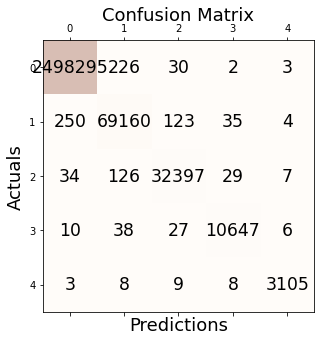

In [ ]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=classes)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:

# confusion matrix
matrix = confusion_matrix(y_test, classes)
print(matrix)

[[2498295     226      30       2       3]
 [    250   69160     123      35       4]
 [     34     126   32397      29       7]
 [     10      38      27   10647       6]
 [      3       8       9       8    3105]]


In [ ]:
# # testing 

# import numpy as np
# from keras.callbacks import Callback
# from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


# class Metrics(Callback):

#     def on_train_begin(self, logs={}):
#         self.val_f1s = []
#         self.val_recalls = []
#         self.val_precisions = []

#     def on_epoch_end(self, epoch, logs={}):
#         val_predict = (np.asarray(self.model.predict(
#             self.model.validation_data[0]))).round()
#         val_targ = self.model.validation_data[1]
#         _val_f1 = f1_score(val_targ, val_predict)
#         _val_recall = recall_score(val_targ, val_predict)
#         _val_precision = precision_score(val_targ, val_predict)
#         self.val_f1s.append(_val_f1)
#         self.val_recalls.append(_val_recall)
#         self.val_precisions.append(_val_precision)
#         print(f" — val_f1: {_val_f1} — val_precision: {_val_precision} — val_recall _val_recall")
#         return


# metrics = Metrics()

# Customised Accuracy -- with tensors (pending ...)

In [ ]:
from tensorflow.python.ops import math_ops
from tensorflow import keras as K

@tf.function
def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count

@tf.function
def accuracy_with_tolerence(y_true, y_pred):
    threshold = 3
    difference = tf.abs(tf.subtract(y_true, y_pred)) - threshold
    boolean_results = tf.where(difference > 0, True, False)
    correct_count = tf_count(difference, True)
    incorrect_count = tf_count(difference, False)
    print(y_true.shape)
    print(tf.cast(y_pred[None, 0][0, 0], tf.int32))
    # with tf.Session() as sess:
    #     print(sess.run(correct_count))
    #     print(sess.run(incorrect_count))
    return correct_count / (correct_count + incorrect_count)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[accuracy_with_tolerence])

# fit the model
model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.3f' % acc)
print("Accuracy :{0:.3%}".format(acc))

(None, 1)
Tensor("Cast:0", shape=(), dtype=int32)
Accuracy :nan%


In [ ]:
df.head(50)

In [ ]:
# see some prediction results
for test_index in range(len(X_test[:20, :])):
    cat_predicted = model.predict(scaler.transform([X_test[test_index]]))
    actual_class = y_test[test_index] + min_category
    predicted_class = np.argmax(cat_predicted) + min_category
    print('Actual class: %i\tPredicted class: %i' % (actual_class, predicted_class))
    # print(np.amax(cat_predicted))
    # print(y_test[test_index])

Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Actual class: 1	Predicted class: 1
Actual class: 1	Predicted class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
